In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loading The Dataset

In [311]:
df = pd.read_csv("heart.csv")

# EDA

In [312]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<!-- 
1- age
2- sex
3- chest pain type (4 values)
4- resting blood pressure
5- serum cholestoral in mg/dl
6- fasting blood sugar > 120 mg/dl
7- resting electrocardiographic results (values 0,1,2)
8- maximum heart rate achieved
9- exercise induced angina
10- oldpeak = ST depression induced by exercise relative to rest
11- the slope of the peak exercise ST segment
12- number of major vessels (0-3) colored by flourosopy
13- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
-->

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [314]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

All data is clean, and there is no null values

In [315]:
df["output"].unique()

array([1, 0], dtype=int64)

In [316]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

165 person are having heart disease

## Getting Relations Between The output and Significant Features

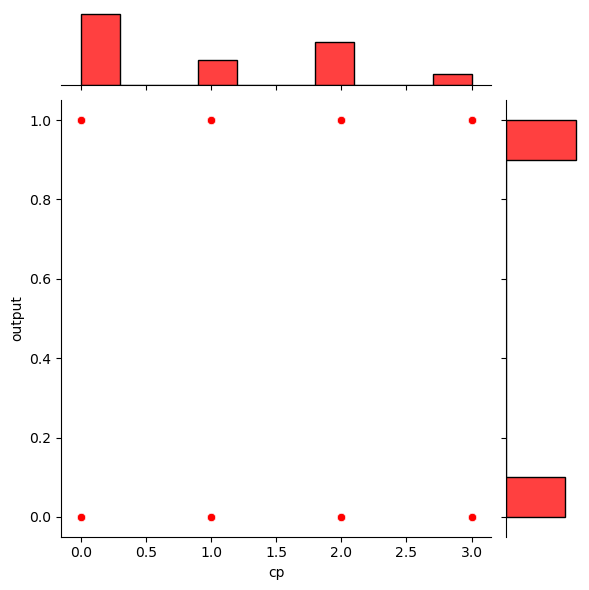

In [317]:
sns.jointplot(x="cp", y="output", data=df ,color="r")

In [318]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [319]:
a = df[df["output"]==1][df["cp"]==0].count()["cp"]
b = df[df["output"]==1][df["cp"]==1].count()["cp"]
c = df[df["output"]==1][df["cp"]==2].count()["cp"]
d = df[df["output"]==1][df["cp"]==3].count()["cp"]

print(f"Type 0 Chest Pain causes {a} of heart disease")
print(f"Type 1 Chest Pain causes {b} of heart disease")
print(f"Type 2 Chest Pain causes {c} of heart disease")
print(f"Type 3 Chest Pain causes {d} of heart disease")

Type 0 Chest Pain causes 39 of heart disease
Type 1 Chest Pain causes 41 of heart disease
Type 2 Chest Pain causes 69 of heart disease
Type 3 Chest Pain causes 16 of heart disease


C:\Users\Alaswad\AppData\Local\Temp\ipykernel_4940\613409644.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df[df["output"]==1][df["cp"]==0].count()["cp"]
C:\Users\Alaswad\AppData\Local\Temp\ipykernel_4940\613409644.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = df[df["output"]==1][df["cp"]==1].count()["cp"]
C:\Users\Alaswad\AppData\Local\Temp\ipykernel_4940\613409644.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = df[df["output"]==1][df["cp"]==2].count()["cp"]
C:\Users\Alaswad\AppData\Local\Temp\ipykernel_4940\613409644.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d = df[df["output"]==1][df["cp"]==3].count()["cp"]


#### Chest pain is categorized for 4 types, and from the above data it is clear that the 2nd type is most likely to cause a heart disease

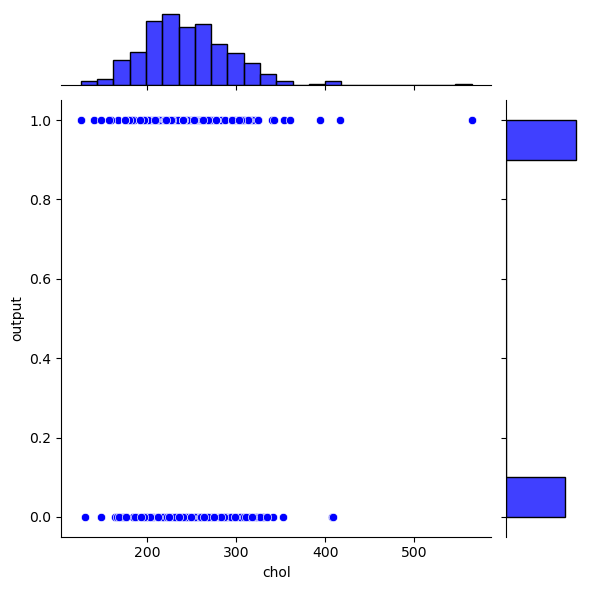

In [320]:
sns.jointplot(x="chol", y="output",data=df ,color="blue")

In [321]:
pd.DataFrame({"Output Vs. chol" : df.groupby(["output"])["chol"].value_counts()})




Output Vs. chol
output chol                 
0      212                 4
       254                 4
       282                 4
       229                 3
       230                 3
...                      ...
1      354                 1
       360                 1
       394                 1
       417                 1
       564                 1

[201 rows x 1 columns]

In [322]:
pd.DataFrame({"Output Vs. chol" : df.groupby(["output"])["chol"].min()})

,Output Vs. chol
output,
0,131
1,126


In [323]:
pd.DataFrame({"Output Vs. chol" : df.groupby(["output"])["chol"].max()})

,Output Vs. chol
output,
0,409
1,564


#### from the above data it is clear that **the high of the Cholestrol reading** in blood is leading to **a heart disease** 

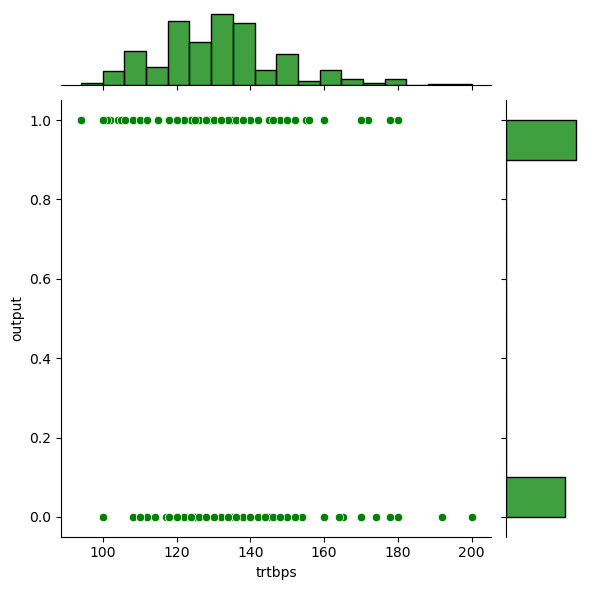

In [324]:
sns.jointplot(x="trtbps", y="output",data=df ,color="green")

c:\Users\Alaswad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trtbps', ylabel='Density'>

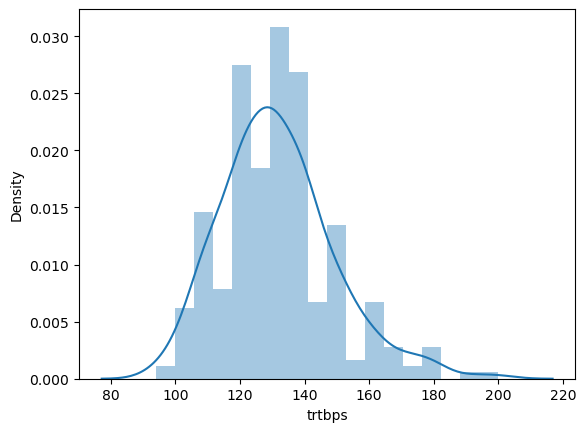

In [325]:
sns.distplot(df["trtbps"])

In [326]:
pd.DataFrame({"Output Vs. trtbps" : df.groupby(["output"])["trtbps"].value_counts()})

Output Vs. trtbps
output trtbps                   
0      140                    15
       120                    14
       130                    13
       110                    11
       150                     8
...                          ...
1      156                     1
       170                     1
       172                     1
       178                     1
       180                     1

[77 rows x 1 columns]

In [327]:
df.groupby(["output"])["trtbps"].min()

output
0    100
1     94
Name: trtbps, dtype: int64

In [328]:
df.groupby(["output"])["trtbps"].max()

output
0    200
1    180
Name: trtbps, dtype: int64

#### From the above data, it is clear that **the high resting blood pressure** might cause **a heart disease** 

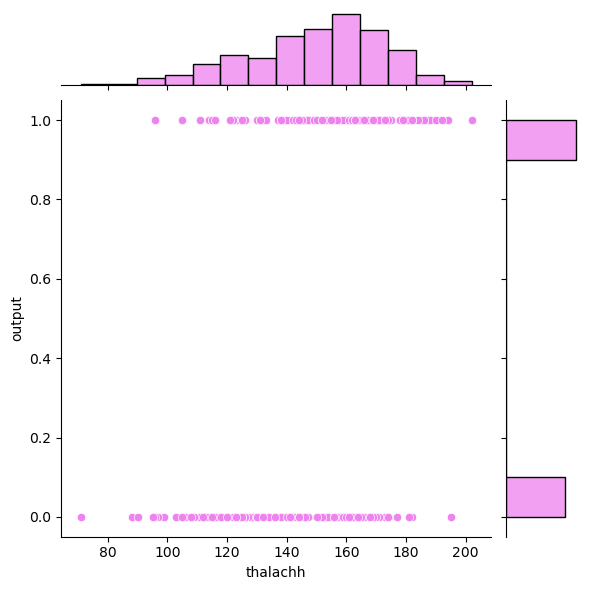

In [329]:
sns.jointplot(x="thalachh", y="output",data=df ,color="violet")

c:\Users\Alaswad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

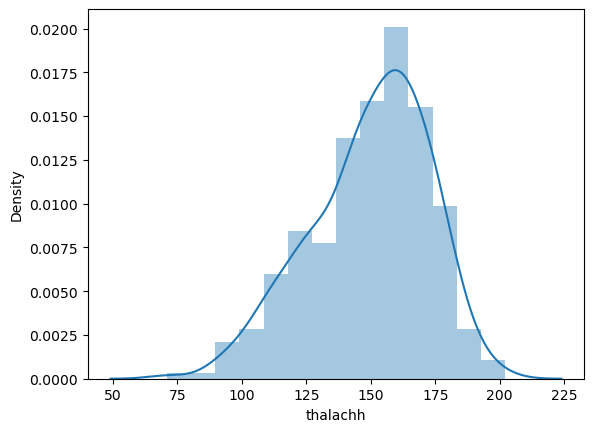

In [330]:
sns.distplot(df["thalachh"])

<AxesSubplot:xlabel='thalachh', ylabel='count'>

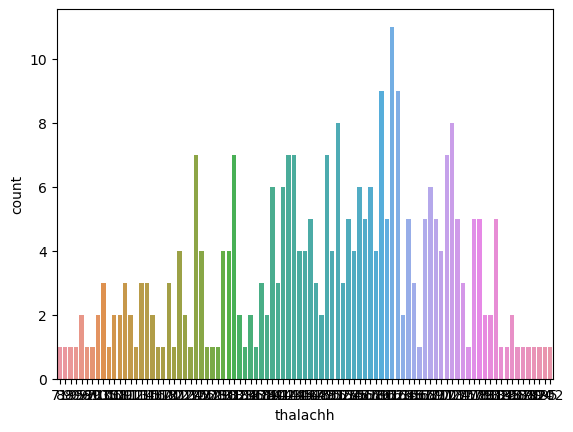

In [331]:
sns.countplot(x="thalachh",data=df)

<AxesSubplot:xlabel='thalachh', ylabel='count'>

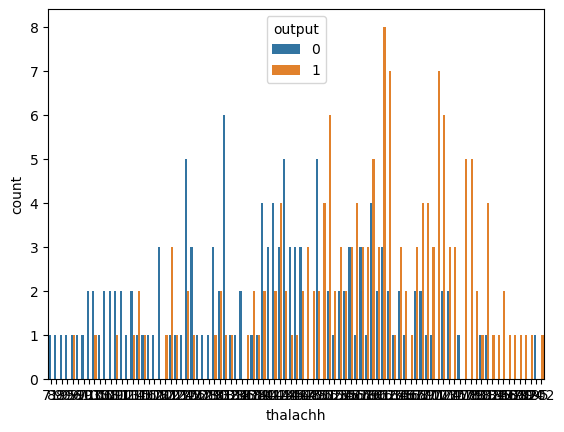

In [332]:
sns.countplot(x="thalachh",data=df,hue="output")

In [333]:
df.groupby(["output"])["thalachh"].min()

output
0    71
1    96
Name: thalachh, dtype: int64

In [334]:
df.groupby(["output"])["thalachh"].max()

output
0    195
1    202
Name: thalachh, dtype: int64

### From the above, it is showing that for the diseased heart, the blood sugar is might be a cause

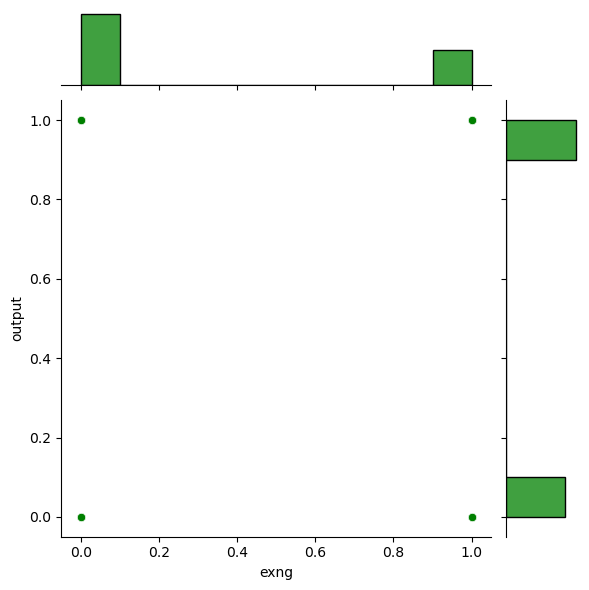

In [335]:
sns.jointplot(x="exng", y="output",data=df ,color="green")

In [336]:
df.groupby(["output"])["exng"].count()

output
0    138
1    165
Name: exng, dtype: int64

### it is not completely clear to me, but I can understand that the heavy work and excessive exercise is not good for the heart disease 

In [337]:
df.groupby(["output"])["age"].count()

output
0    138
1    165
Name: age, dtype: int64

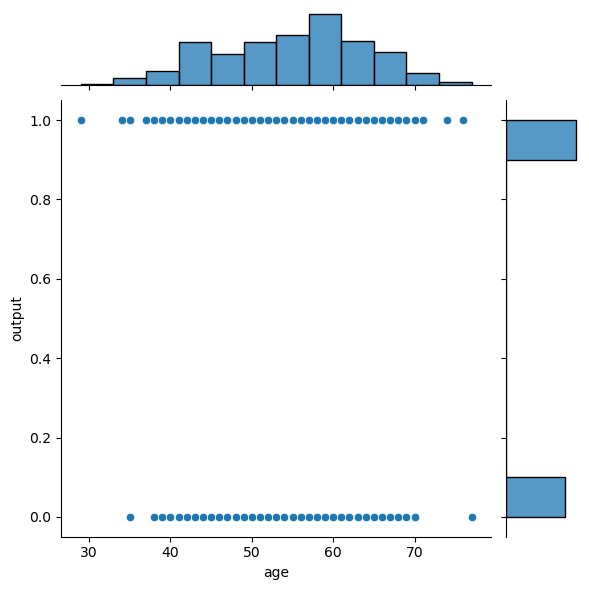

In [338]:
sns.jointplot(x="age" , y="output", data=df)

c:\Users\Alaswad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

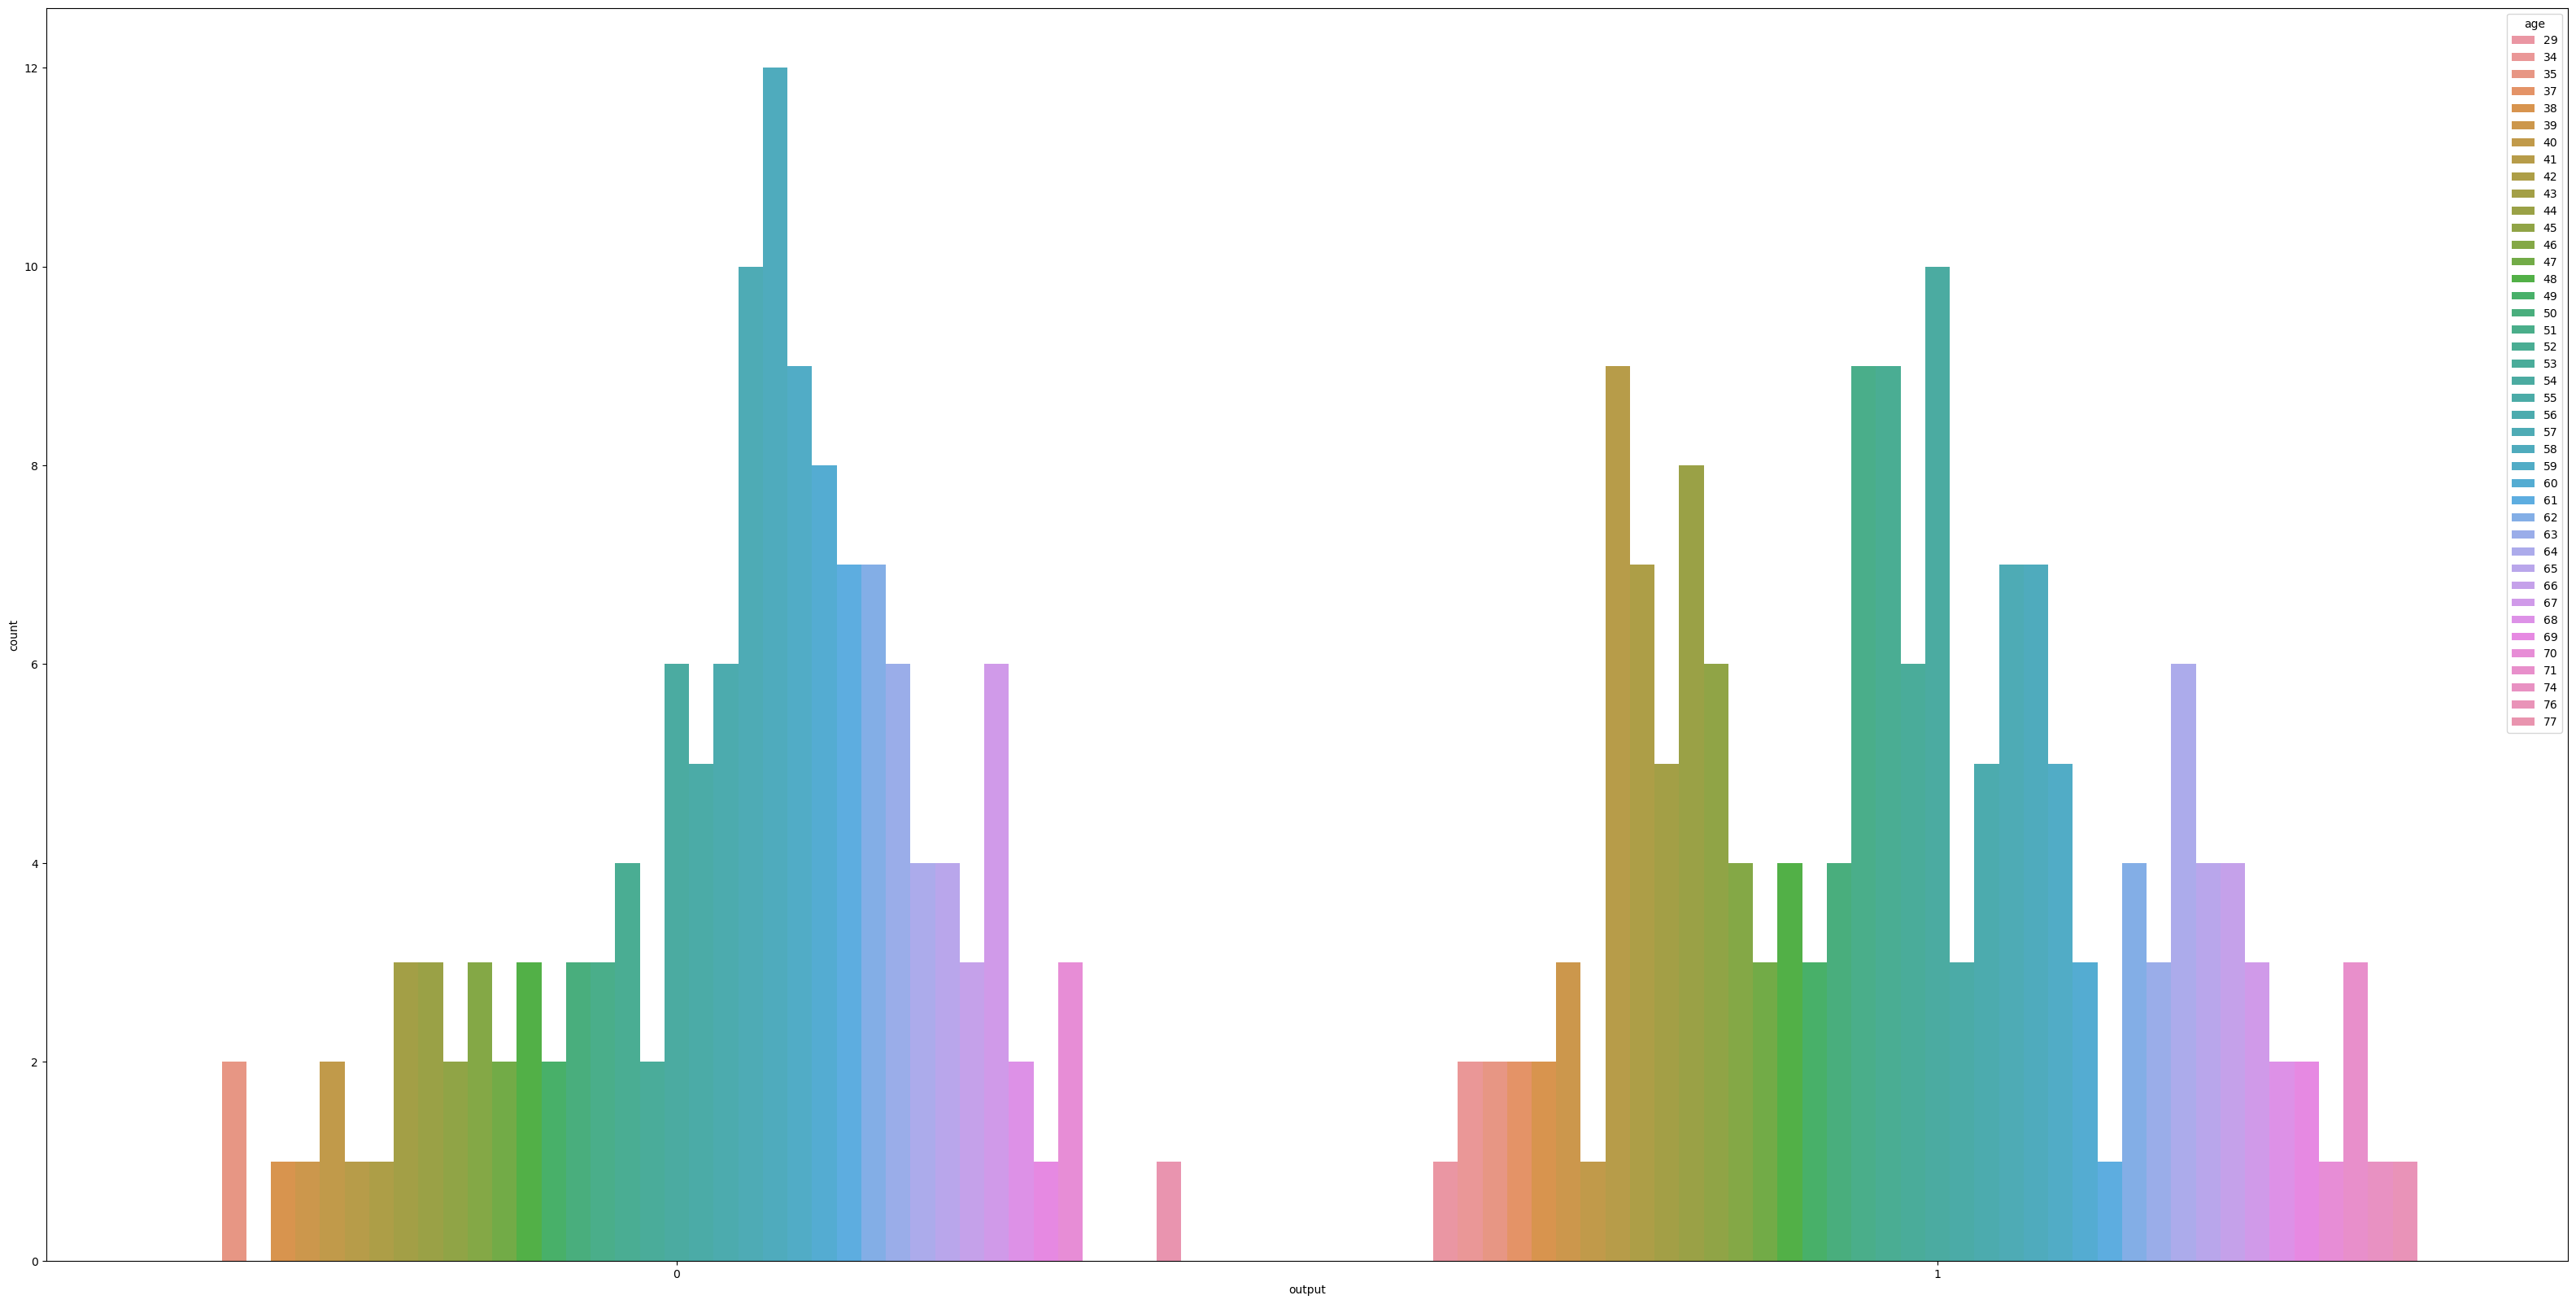

In [339]:
plt.figure(figsize=(40,20))
sns.countplot("output" ,hue="age", data=df)

### Age is not a factor to be used to predict the heart diseases

# Spliting The Data

In [340]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [341]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

Xtrain , Xtest , ytrain , ytest = train_test_split(X , y , test_size= 0.3 , random_state=0 )

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [342]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Algorithms Selection

#### from the above dataset, It is most likely to use the classification algorithms
#### but I would like to apply all algorithms on it and calculate the accuracy and reports.

##  1 - Regression 
##  1.1 - Linear Regression

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

model_linR = LinearRegression()
model_linR.fit(Xtrain , ytrain)
ypred_linR = model_linR.predict(Xtest)

MSE_linR = mean_squared_error(ytest,ypred_linR)
MAE_linR = mean_absolute_error(ytest,ypred_linR)
RMSE_linR = sqrt(MSE_linR)
r2_score_linR = r2_score(ytest,ypred_linR)

print(f'MSE For Linear Regression Model   : {MSE_linR}')
print(f'MAE For Linear Regression Model   : {MAE_linR}')
print(f'RMSE For Linear Regression Model  : {RMSE_linR}')
print(f'r2_score For Linear Regression Model  : {r2_score_linR*100:.2f}%')

MSE For Linear Regression Model   : 0.14201586239850897
MAE For Linear Regression Model   : 0.3141195071934648
RMSE For Linear Regression Model  : 0.3768499202580637
r2_score For Linear Regression Model  : 43.13%


#### the Algorithm Is Very Weak and Deosn't Suitable For the Data

## 1.2 - Polynomial Regression

In [344]:
from sklearn.preprocessing import PolynomialFeatures

model_polyR = PolynomialFeatures(degree = 2)
X_polytrain = model_polyR.fit_transform(Xtrain)
X_polytest = model_polyR.transform(Xtest)
#y_polytrain = model_polyR.transform(ytrain)
#y_polytest = model_polyR.transform(ytest)

lin_poly = LinearRegression()
lin_poly.fit(X_polytrain,ytrain)
ypred_polyR = lin_poly.predict(X_polytest)

MSE_polyR = mean_squared_error(ytest,ypred_polyR)
MAE_polyR = mean_absolute_error(ytest,ypred_polyR)
RMSE_polyR = sqrt(MSE_polyR)
r2_score_polyR = r2_score(ytest,ypred_polyR)

print(f'MSE For Polynomial Regression Model   : {MSE_polyR}')
print(f'MAE For Polynomial Regression Model   : {MAE_polyR}')
print(f'RMSE For Polynomial Regression Model  : {RMSE_polyR}')
print(f'r2_score For Linear Regression Model  : {r2_score_polyR*100:.2f}%')

MSE For Polynomial Regression Model   : 0.18656406259921554
MAE For Polynomial Regression Model   : 0.3338841029575893
RMSE For Polynomial Regression Model  : 0.43193062243746455
r2_score For Linear Regression Model  : 25.29%


#### the Algorithm Is Very Weak and Deosn't Suitable For the Data, when degree increased , the r2_score is reduced

## 1.3 - Decission Tree Regressor

|--- cp <= -0.45
|   |--- caa <= -0.20
|   |   |--- thall <= 0.36
|   |   |   |--- exng <= 0.33
|   |   |   |   |--- chol <= 1.24
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- chol >  1.24
|   |   |   |   |   |--- chol <= 2.06
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- chol >  2.06
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |--- exng >  0.33
|   |   |   |   |--- oldpeak <= -0.24
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- oldpeak >  -0.24
|   |   |   |   |   |--- trtbps <= -0.99
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- trtbps >  -0.99
|   |   |   |   |   |   |--- value: [0.00]
|   |   |--- thall >  0.36
|   |   |   |--- oldpeak <= -0.41
|   |   |   |   |--- age <= -1.40
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- age >  -1.40
|   |   |   |   |   |--- chol <= -0.26
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- chol >  -0.26
|   |   |   |   |   |   |--- valu

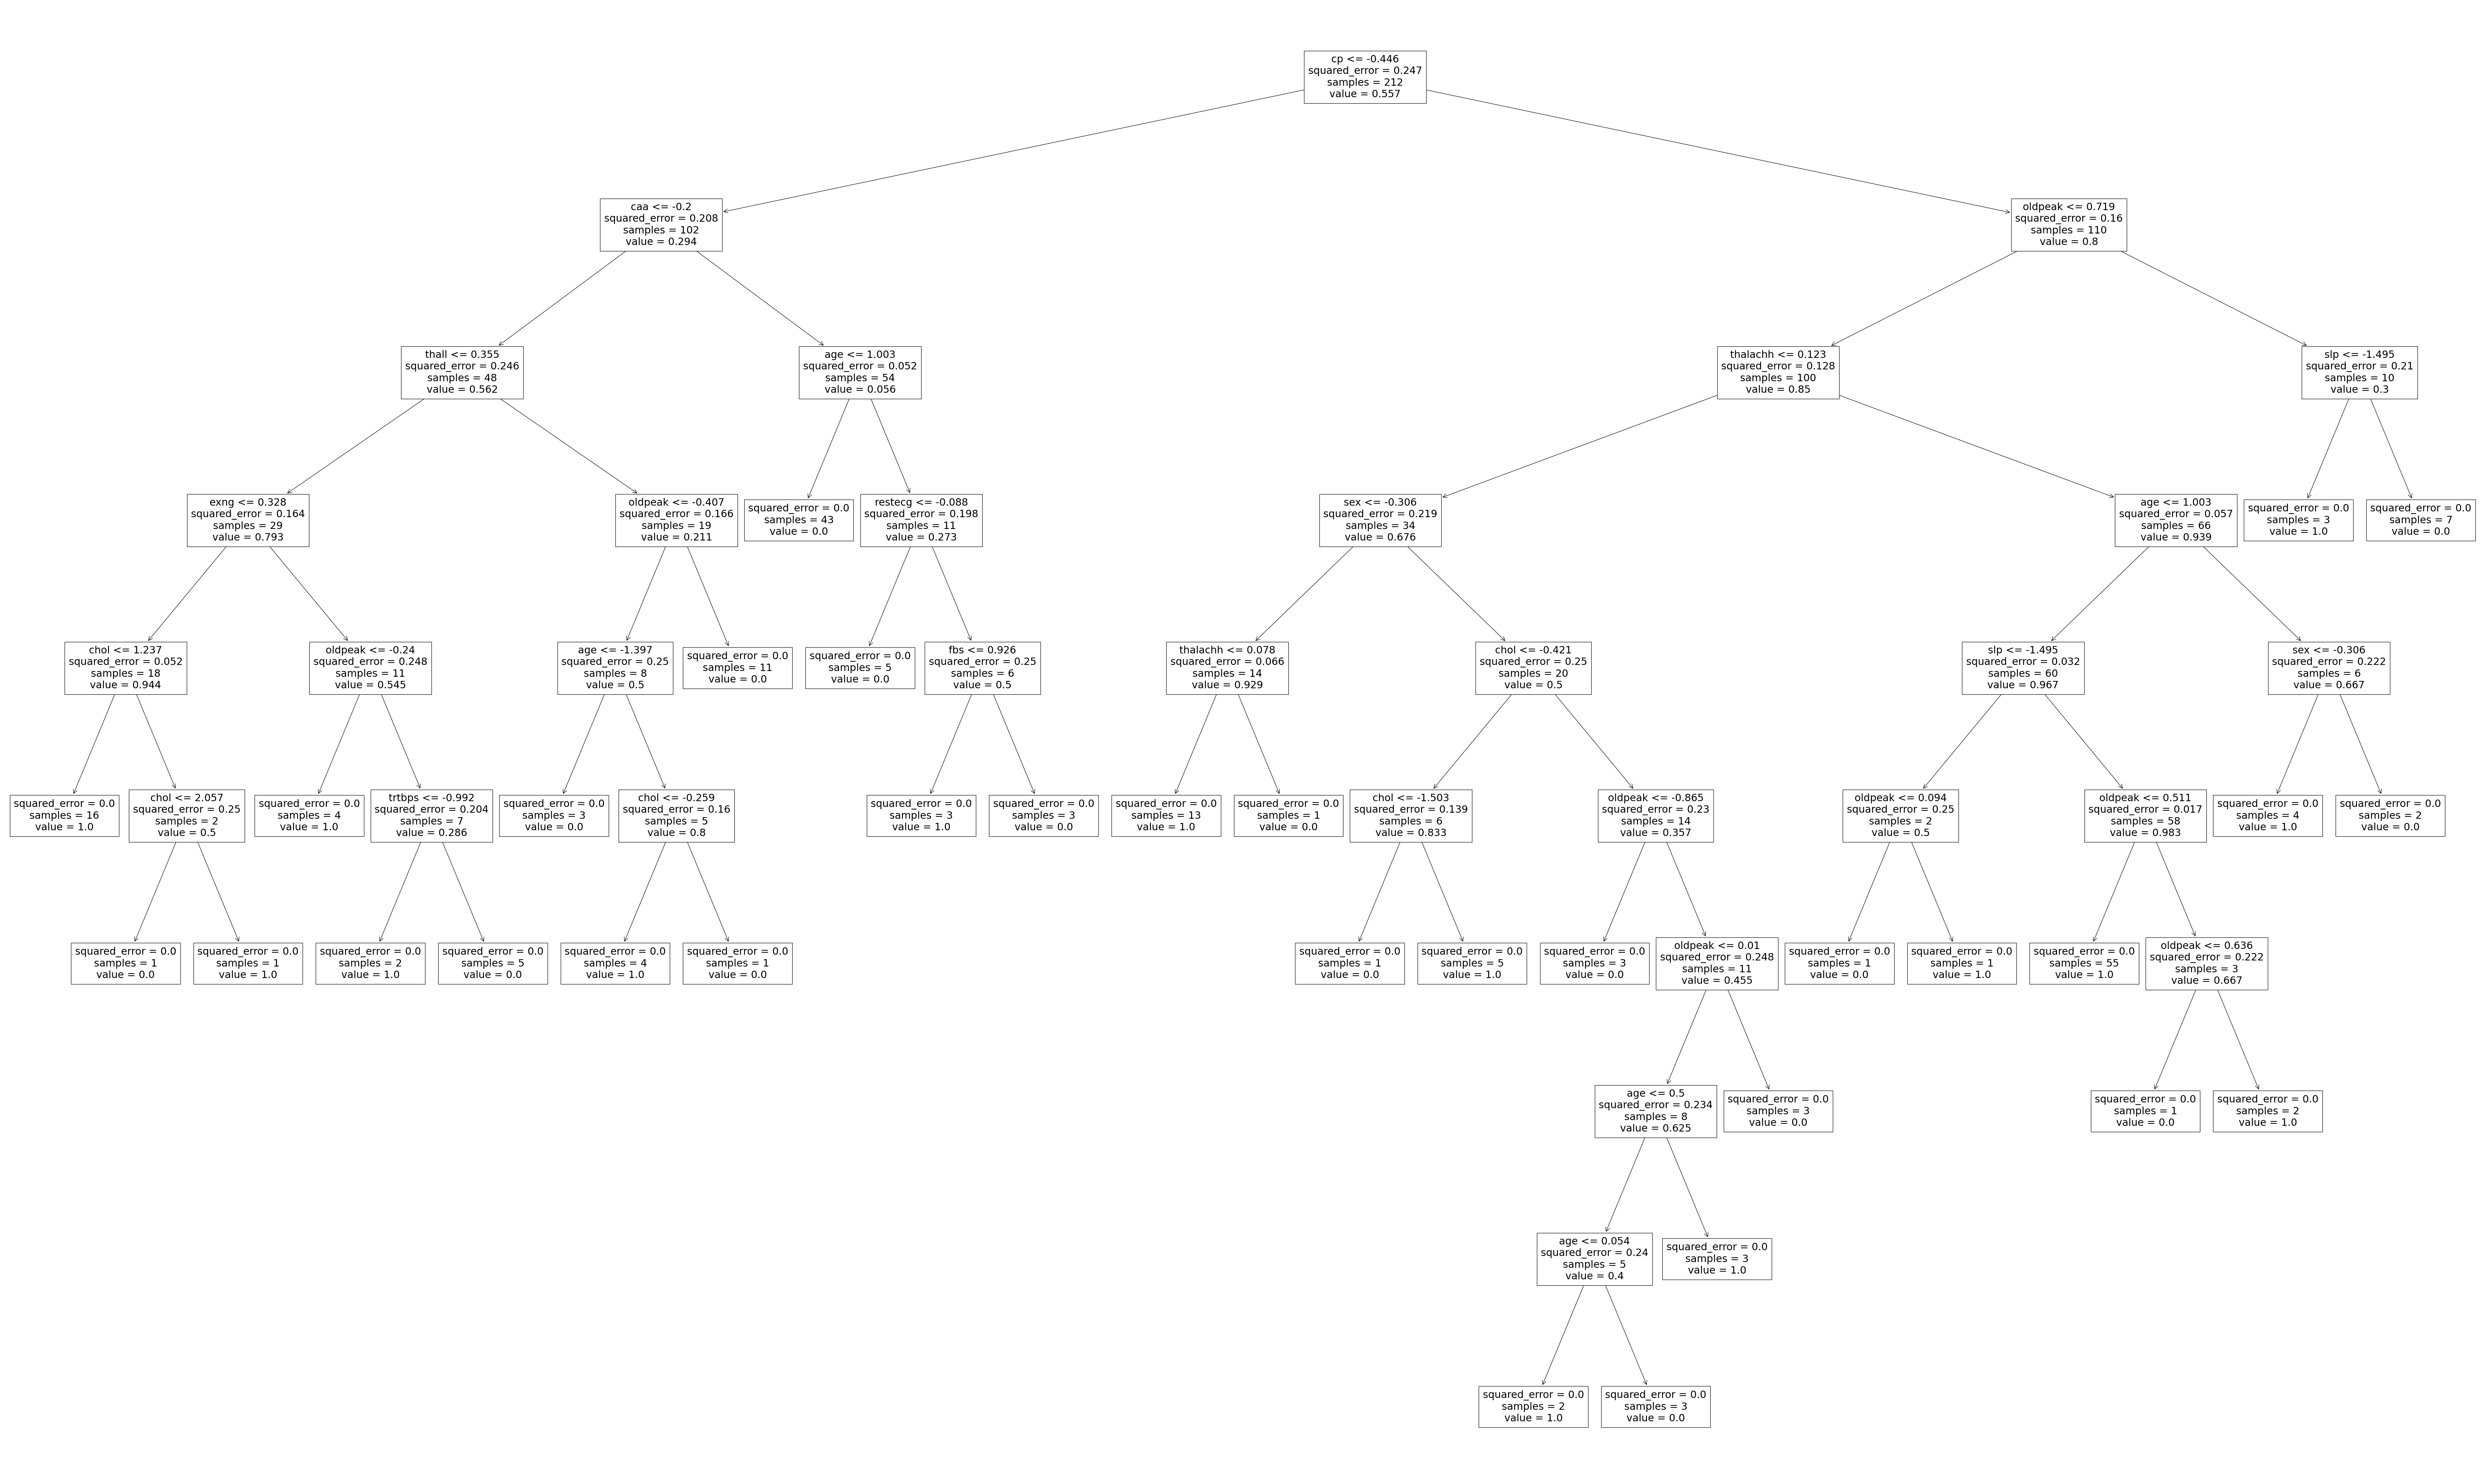

In [345]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree

model_tree = DecisionTreeRegressor(random_state=0 , max_depth=10)
model_tree.fit(Xtrain , ytrain)
ypred_tree = model_tree.predict(Xtest)

featureList = list(X.columns)
TargetList = list(y)
tree_text = export_text(model_tree, feature_names= featureList)

plt.figure(figsize=(100,60),dpi=100)
visualization = plot_tree(model_tree, feature_names= featureList)
print(tree_text)

MSE_treeR = mean_squared_error(ytest,ypred_tree)
MAE_treeR = mean_absolute_error(ytest,ypred_tree)
RMSE_treeR = sqrt(MSE_treeR)
r2_score_treeR = r2_score(ytest,ypred_tree)

print(f'MSE For Decission Tree Regression Model       : {MSE_treeR}')
print(f'MAE For Decission Tree Regression Model       : {MAE_treeR}')
print(f'RMSE For Decission Tree Regression Model      : {RMSE_treeR}')
print(f'r2_score For Decission Tree Regression Model  : {r2_score_treeR*100:.2f}%')

## 1.4 - Random Forest

In [346]:
from sklearn.ensemble import RandomForestRegressor

model_randF = RandomForestRegressor(n_estimators= 13 , random_state=0)
model_randF.fit(Xtrain , ytrain)
ypred_randF = model_randF.predict(Xtest)

#randF_text = export_text(model_randF, feature_names= featureList)
#print(randF_text)

#plt.figure(figsize=(60,60),dpi=100)
#visualization = plot_tree(model_randF, feature_names= featureList)

MSE_randF = mean_squared_error(ytest,ypred_randF)
MAE_randF = mean_absolute_error(ytest,ypred_randF)
RMSE_randF = sqrt(MSE_randF)
r2_score_randF = r2_score(ytest,ypred_randF)

print(f'MSE For Decission Tree Regression Model       : {MSE_randF}')
print(f'MAE For Decission Tree Regression Model       : {MAE_randF}')
print(f'RMSE For Decission Tree Regression Model      : {RMSE_randF}')
print(f'r2_score For Decission Tree Regression Model  : {r2_score_randF*100:.2f}%')

MSE For Decission Tree Regression Model       : 0.15118018076597958
MAE For Decission Tree Regression Model       : 0.283178360101437
RMSE For Decission Tree Regression Model      : 0.38881895628425783
r2_score For Decission Tree Regression Model  : 39.46%


## 2 - Classification
## 2.1 - Logistics 

In [347]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model_logR = LogisticRegression(random_state=0)
model_logR.fit(Xtrain , ytrain)
ypred_logR = model_logR.predict(Xtest)

cm_logR = confusion_matrix(ypred_logR,ytest)
print(f"Confusion Matrix Of Logistic Regression : \n ", cm_logR)

accuracyScore_logR = accuracy_score(ypred_logR , ytest)
print(f"Accuracy Score Of Logistics Regreesion : {accuracyScore_logR*100:.2f}%") 

report_logR = classification_report(ypred_logR , ytest)
print(report_logR)

Confusion Matrix Of Logistic Regression : 
  [[32  5]
 [12 42]]
Accuracy Score Of Logistics Regreesion : 81.32%
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.89      0.78      0.83        54

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



## 2.2 - KNN 

In [348]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(Xtrain , ytrain)
ypred_knn = model_knn.predict(Xtest)

cm_knn = confusion_matrix(ypred_knn,ytest)
print(f"Confusion Matrix Of Logistic Regression : \n ", cm_knn)

accuracyScore_knn = accuracy_score(ypred_knn , ytest)
print(f"Accuracy Score Of Logistics Regreesion : {accuracyScore_knn*100:.2f}%") 

report_knn = classification_report(ypred_knn , ytest)
print(report_knn)

Confusion Matrix Of Logistic Regression : 
  [[32  4]
 [12 43]]
Accuracy Score Of Logistics Regreesion : 82.42%
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        36
           1       0.91      0.78      0.84        55

    accuracy                           0.82        91
   macro avg       0.82      0.84      0.82        91
weighted avg       0.84      0.82      0.83        91



c:\Users\Alaswad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 2.4 - SVM "Linear"

In [349]:
from sklearn.svm  import SVC

model_svmL = SVC(kernel="linear" , C=0.7 , random_state=0)
model_svmL.fit(Xtrain , ytrain)
ypred_svm = model_svmL.predict(Xtest)


cm_svm = confusion_matrix(ypred_svm,ytest)
print(f"Confusion Matrix Of Logistic Regression : \n ", cm_svm)

accuracyScore_svm = accuracy_score(ypred_svm , ytest)
print(f"Accuracy Score Of Logistics Regreesion : {accuracyScore_svm*100:.2f}%") 

report_svm = classification_report(ypred_svm , ytest)
print(report_svm)

Confusion Matrix Of Logistic Regression : 
  [[32  4]
 [12 43]]
Accuracy Score Of Logistics Regreesion : 82.42%
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        36
           1       0.91      0.78      0.84        55

    accuracy                           0.82        91
   macro avg       0.82      0.84      0.82        91
weighted avg       0.84      0.82      0.83        91



## 2.4 - SVM "Polynomial"

In [350]:
model_svmP = SVC(kernel="poly" , C=2 , random_state=0)

model_svmP.fit(Xtrain , ytrain)

ypred_svmP = model_svmP.predict(Xtest)

cm_svmP = confusion_matrix(ypred_svmP,ytest)
print(f"Confusion Matrix Of Logistic Regression : \n ", cm_svmP)

accuracyScore_svmP = accuracy_score(ypred_svmP , ytest)
print(f"Accuracy Score Of Logistics Regreesion : {accuracyScore_svmP*100:.2f}%") 

report_svmP = classification_report(ypred_svmP , ytest)
print(report_svmP)

Confusion Matrix Of Logistic Regression : 
  [[33  6]
 [11 41]]
Accuracy Score Of Logistics Regreesion : 81.32%
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.87      0.79      0.83        52

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



# The Best Algorithms To be Used Are ***The Logistic Regression*** and ***The KNeighborsClassifier*** With Accuracy Of 82.42%